In [ ]:
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
import tensorflow as tf
from keras import layers
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_images =  train_images.astype('float32')/ 255
test_images =  test_images.astype('float32')/ 255
train_labels = keras.utils.to_categorical(train_labels)
test_labels = keras.utils.to_categorical(test_labels)



In [ ]:
train_images = train_images[0:10]
test_images = test_images[0:10]
train_labels = train_labels[0:10]
test_labels = test_labels[0:10]

In [ ]:
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)


In [ ]:
datagen = ImageDataGenerator(rotation_range=45)

In [ ]:
aug = datagen.flow(train_images, train_labels, batch_size= 10)


In [ ]:
batch_0 = aug[0]
batch_0_images = aug[0][0]
batch_0_labels = aug[0][1]

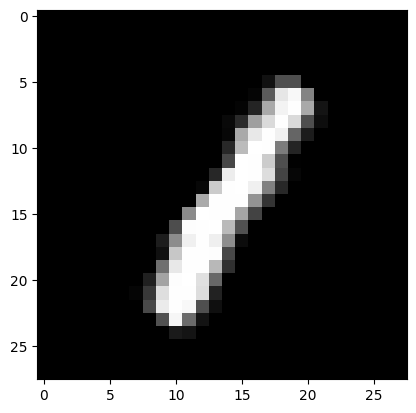

In [ ]:
plt.imshow(aug[0][0][0], cmap='gray')

In [ ]:
aug[0][1][0]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

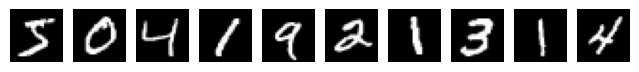

In [ ]:
rows = 1
columns = 10

fig = plt.figure(figsize=(8, 8))
for i in range(1, 11):
  img = train_images[i-1]
  fig.add_subplot(rows, columns, i)
  plt.axis('off')
  plt.imshow(img, cmap='gray')
plt.show()

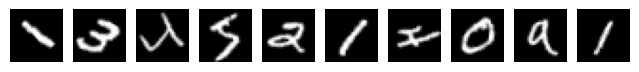

In [ ]:
rows = 1
columns = 10

fig = plt.figure(figsize=(8, 8))
for i in range(1, 11):
  img = aug[0][0][i-1]
  fig.add_subplot(rows, columns, i)
  plt.axis('off')
  plt.imshow(img, cmap='gray')
plt.show()

In [ ]:
concatenated_train_images = np.concatenate((train_images, aug[0][0]), axis=0)
concatenated_train_lbl = np.concatenate((train_labels, aug[0][1]), axis=0)


In [ ]:
concatenated_train_images.shape

(20, 28, 28, 1)

In [ ]:
concatenated_train_lbl.shape

(20, 10)

In [ ]:
from keras.models import Sequential
from keras import layers

In [ ]:
model = Sequential()

#CNN
model.add(layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', strides=(1, 1), input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64,  kernel_size=(3, 3), padding='same', activation='relu', strides=(1, 1)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(128,  kernel_size=(3, 3), padding='same', activation='relu', strides=(1, 1)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

#Classification
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy' , metrics=['accuracy'])
hist = model.fit(concatenated_train_images, concatenated_train_lbl,validation_split=0.1, verbose=1 , epochs=5, batch_size=32)


Epoch 1/5
1/1 [==============================] - 17s 17s/step - loss: 2.5657 - accuracy: 0.1667 - val_loss: 2.3347 - val_accuracy: 0.5000
Epoch 2/5
1/1 [==============================] - 0s 42ms/step - loss: 1.4655 - accuracy: 0.5556 - val_loss: 2.2861 - val_accuracy: 0.5000
Epoch 3/5
1/1 [==============================] - 0s 55ms/step - loss: 1.4277 - accuracy: 0.3333 - val_loss: 2.2768 - val_accuracy: 0.5000
Epoch 4/5
1/1 [==============================] - 0s 39ms/step - loss: 0.9296 - accuracy: 0.7778 - val_loss: 2.2556 - val_accuracy: 0.5000
Epoch 5/5
1/1 [==============================] - 0s 40ms/step - loss: 0.7197 - accuracy: 0.9444 - val_loss: 2.2146 - val_accuracy: 0.5000


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
model.save('/content/drive/MyDrive/mnist_model/mnist_test_model.h5')

In [ ]:
loaded_model = keras.models.load_model('/content/drive/MyDrive/mnist_model/mnist_test_model.h5')

In [ ]:
import cv2
im_gray_2 = cv2.imread('/content/drive/MyDrive/Test_MNIST/seven.png', cv2.IMREAD_GRAYSCALE)
im_gray_inverted= cv2.bitwise_not(im_gray_2)
im_gray_resized = cv2.resize(im_gray_inverted, (28, 28))
im_gray_flatten = im_gray_resized.reshape(1, 28, 28, 1)
im_gray_normalized = im_gray_flatten.astype('float32')/255
preds = loaded_model.predict(im_gray_normalized)
predicted_label = np.argmax(preds)
print(predicted_label)

1/1 [==============================] - 0s 194ms/step
2


In [ ]:
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                        

In [ ]:
for layer in loaded_model.layers:
  print(layer)

In [ ]:
feature_extractor =  keras.models.Model(inputs=loaded_model.input, outputs=loaded_model.layers[-3].output)

In [ ]:
feature_extractor.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0     

In [ ]:
model1 = Sequential()
model1.add(feature_extractor)
model1.add(layers.Conv2D(528, (1, 1), activation='relu'))
model1.add(layers.Flatten())
model1.add(layers.Dense(10, activation='softmax'))

In [ ]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model (Functional)          (None, 3, 3, 128)         92800     
                                                                 
 conv2d_3 (Conv2D)           (None, 3, 3, 528)         68112     
                                                                 
 flatten_1 (Flatten)         (None, 4752)              0         
                                                                 
 dense_1 (Dense)             (None, 10)                47530     
                                                                 
Total params: 208,442
Trainable params: 208,378
Non-trainable params: 64
_________________________________________________________________


In [ ]:
model1.compile(optimizer='adam', loss='categorical_crossentropy' , metrics=['accuracy'])
hist = model1.fit(concatenated_train_images, concatenated_train_lbl,validation_split=0.1, verbose=2 , epochs=5, batch_size=1)


Epoch 1/5
18/18 - 4s - loss: 2.8923 - accuracy: 0.2778 - val_loss: 2.2351 - val_accuracy: 0.5000 - 4s/epoch - 206ms/step
Epoch 2/5
18/18 - 0s - loss: 1.5780 - accuracy: 0.5000 - val_loss: 2.2091 - val_accuracy: 0.5000 - 150ms/epoch - 8ms/step
Epoch 3/5
18/18 - 0s - loss: 1.0245 - accuracy: 0.7778 - val_loss: 2.0229 - val_accuracy: 0.5000 - 134ms/epoch - 7ms/step
Epoch 4/5
18/18 - 0s - loss: 0.4061 - accuracy: 0.8889 - val_loss: 1.7584 - val_accuracy: 0.5000 - 196ms/epoch - 11ms/step
Epoch 5/5
18/18 - 0s - loss: 0.3221 - accuracy: 0.9444 - val_loss: 1.7648 - val_accuracy: 0.5000 - 135ms/epoch - 8ms/step


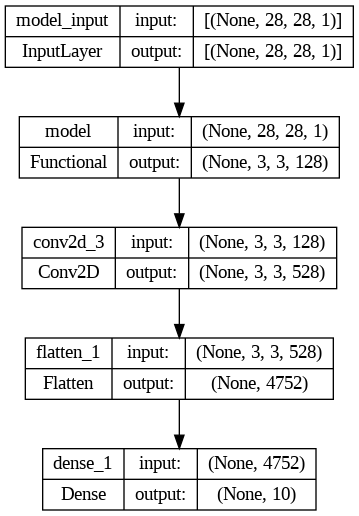

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model1, show_shapes=True)

In [ ]:
loaded_model.compile(optimizer='adam', loss='categorical_crossentropy' , metrics=['accuracy'])
hist = loaded_model.fit(concatenated_train_images, concatenated_train_lbl,validation_split=0.1, verbose=1 , epochs=5, batch_size=32)


Epoch 1/5
1/1 [==============================] - 2s 2s/step - loss: 1.0280 - accuracy: 0.7778 - val_loss: 2.0832 - val_accuracy: 0.5000
Epoch 2/5
1/1 [==============================] - 0s 37ms/step - loss: 0.6413 - accuracy: 0.8889 - val_loss: 2.0257 - val_accuracy: 0.5000
Epoch 3/5
1/1 [==============================] - 0s 36ms/step - loss: 0.4306 - accuracy: 0.9444 - val_loss: 1.9805 - val_accuracy: 0.5000
Epoch 4/5
1/1 [==============================] - 0s 35ms/step - loss: 0.2763 - accuracy: 0.9444 - val_loss: 1.9185 - val_accuracy: 0.5000
Epoch 5/5
1/1 [==============================] - 0s 33ms/step - loss: 0.1164 - accuracy: 1.0000 - val_loss: 1.8456 - val_accuracy: 0.5000


In [ ]:
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                        

In [ ]:
for layer in feature_extractor.layers:
  layer.trainable=False


#feature_extractor.trainable=False

In [ ]:
feature_extractor.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0     

In [ ]:
model2 = Sequential()
model2.add(feature_extractor)
model2.add(layers.Conv2D(528, (3, 3), activation='relu'))
model2.add(layers.Flatten())
model2.add(layers.Dense(10, activation='softmax'))

In [ ]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model (Functional)          (None, 3, 3, 128)         92800     
                                                                 
 conv2d_4 (Conv2D)           (None, 1, 1, 528)         608784    
                                                                 
 flatten_2 (Flatten)         (None, 528)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5290      
                                                                 
Total params: 706,874
Trainable params: 614,074
Non-trainable params: 92,800
_________________________________________________________________


In [ ]:
model2.compile(optimizer='adam', loss='categorical_crossentropy' , metrics=['accuracy'])
hist = model2.fit(concatenated_train_images, concatenated_train_lbl,validation_split=0.1, verbose=2 , epochs=5, batch_size=1)


Epoch 1/5
18/18 - 1s - loss: 2.4446 - accuracy: 0.2778 - val_loss: 1.9197 - val_accuracy: 0.5000 - 1s/epoch - 74ms/step
Epoch 2/5
18/18 - 0s - loss: 1.7559 - accuracy: 0.3889 - val_loss: 1.8055 - val_accuracy: 0.5000 - 103ms/epoch - 6ms/step
Epoch 3/5
18/18 - 0s - loss: 1.1710 - accuracy: 0.8333 - val_loss: 1.4234 - val_accuracy: 0.5000 - 93ms/epoch - 5ms/step
Epoch 4/5
18/18 - 0s - loss: 0.7884 - accuracy: 0.9444 - val_loss: 1.3899 - val_accuracy: 0.5000 - 95ms/epoch - 5ms/step
Epoch 5/5
18/18 - 0s - loss: 0.6455 - accuracy: 0.8889 - val_loss: 1.1890 - val_accuracy: 0.5000 - 81ms/epoch - 4ms/step


In [ ]:
pretrained_model_include_top_false = tf.keras.applications.ResNet50(include_top=False, input_shape=(32, 32, 3), weights='imagenet')

for layer in pretrained_model_include_top_false.layers:
  layer.trainable = False


In [ ]:
pretrained_model_include_top_true = tf.keras.applications.ResNet50(include_top=True, input_shape=(224, 224, 3), weights='imagenet')


102967424/102967424 [==============================] - 4s 0us/step


In [ ]:
resnet_model = Sequential()
resnet_model.add(pretrained_model_include_top_false)
resnet_model.add(layers.Flatten())
resnet_model.add(layers.Dense(10, activation='softmax'))

In [ ]:
pretrained_model_include_top_false.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 16, 16, 64)   256         ['conv1_conv[0][0]']             
                                                                                           

In [ ]:
pretrained_model_include_top_true.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           